In [6]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT import IRT

In [7]:
import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
train_dataset = MyDataset(split='train')
val_dataset = MyDataset(split='val')
test_dataset = MyDataset(split='test')
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[0]['user_num']
item_num = dataset_info[0]['item_num']
print(user_num, item_num)

batch_size = 4096
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]


NameError: name 'MyDataset' is not defined

In [6]:
for batch in train_loader:
    print(batch)
    print(batch['user_id'])
    break

{'user_id': tensor([5095, 4465, 2973,  ..., 4909, 2831, 7335]), 'item_id': tensor([129,  80,  91,  ...,   9,  85,  86]), 'response': tensor([0., 0., 1.,  ..., 0., 1., 1.]), 'FISCED': tensor([1, 4, 1,  ..., 4, 4, 4]), 'ESCS': tensor([-1.4536, -0.5882, -0.0408,  ...,  1.7505,  1.2775,  1.1205]), 'cls_labels': [tensor([0., 0., 0.,  ..., 0., 1., 1.]), tensor([1., 1., 1.,  ..., 1., 1., 1.]), tensor([1., 1., 1.,  ..., 1., 1., 1.]), tensor([1., 1., 1.,  ..., 1., 1., 1.]), tensor([0., 0., 0.,  ..., 1., 1., 1.])]}
tensor([5095, 4465, 2973,  ..., 4909, 2831, 7335])


In [7]:
import torch
A = torch.tensor([0,1,2,3])
A.unsqueeze(-1)

tensor([[0],
        [1],
        [2],
        [3]])

In [8]:
import numpy as np
y_pred = [0.1, 0.2, 0.5, 0.6]
np.array(y_pred) >= 0.5

array([False, False,  True,  True])

In [9]:
import os
import shutil
save_path = '/zjq/zhangdacao/pisa/save/IRT_baseline'
if os.path.exists(save_path) and os.path.isdir(save_path) and os.listdir(save_path):
    shutil.rmtree(save_path)
    os.makedirs(save_path)
model = IRT(user_num=user_num, item_num=item_num, save_path=save_path)

In [10]:
model.train(train_data=train_loader, test_data=val_loader, epoch=1000, device="cuda:0", lr=0.001)

In [ ]:
import pandas as pd

def check_nan_columns(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Check for NaN values in each column
    nan_columns = df.columns[df.isna().any()].tolist()

    if nan_columns:
        print("Columns with NaN values:")
        for col in nan_columns:
            print(col)
    else:
        print("No columns with NaN values.")

# Example usage
csv_file_path = "/zjq/zhangdacao/pisa/datasets/Australia/train.csv"
check_nan_columns(csv_file_path)


Columns with NaN values:
ST013Q01TA


In [3]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 0
mode = 'sensitive'
sensitive_name = 'escs'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
model.load('/zjq/zhangdacao/pisa/save_new/A_ESCS_IRT_CDM_with_sensitiveAustralia/model-epoch24-auc0.805-acc0.73')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Australia
174808 24723 50196
{'user_id': tensor(7419), 'item_id': tensor(144), 'response': tensor(0.), 'FISCED': tensor(1), 'ESCS': tensor(-0.5399), 'knowledge_list': tensor([14, 26, 40, 33]), 'cls_labels': [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]}
8485 184


In [4]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE only add_fair

evaluating:   0%|                                                            | 0/99 [00:00<?, ?it/s]

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:06<00:00, 15.16it/s]


pre_1: 0.5186070603235318 0.482548410231891 0.4805960634313491
0.2549217566885411 0.32011994441600233 0.3710676244736191
0.3148652739933394 0.24638949671772428 0.2129608938547486


(0.047535171060486436,
 -0.10190438013859082,
 -0.11614586778507796,
 0.7362515419029106,
 0.7867649514400992,
 0.7064307912981114,
 [0.45, 0.65, 0.45, 0.5, 0.5])

In [33]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE only add_fair

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:06<00:00, 15.81it/s]


(0.013167765742132603,
 -0.05697353176475761,
 -0.03223051488521689,
 0.7564540644576528,
 0.8020981668641822,
 0.7256952745238664,
 [0.5, 0.45, 1.0, 1.0, 0.65])

In [25]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE only fair

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.63it/s]


(0.011313517408308315,
 -0.00041587383739516426,
 0.007552072489825812,
 0.7349937408574256,
 0.8012454742216009,
 0.7253566021196908,
 [0.4, 0.65, 0.2, 0.65, 0.5])

In [13]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE only reverse

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.69it/s]


(0.05252794736839039,
 0.12363481987764638,
 0.12866666074800026,
 0.6918510933902017,
 0.8089746141127745,
 0.7332058331341142,
 [0.35, 0.4, 0.45, 0.45, 0.5])

In [11]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE only cls

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.93it/s]


(0.05032262285775083,
 0.11800506395912297,
 0.1231277059403112,
 0.698222416153053,
 0.8087958984782743,
 0.7327874731054267,
 [0.5, 0.5, 1.0, 1.0, 0.85])

In [7]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE only ce

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 16.67it/s]


(0.05451278383293418,
 0.12491072108139378,
 0.13352759480276066,
 0.6885453309158536,
 0.8088547873129261,
 0.7328870826360666,
 [0.45, 0.45, 0.5, 0.25, 0.55])

In [27]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCS without cls

evaluating:   0%|                                                            | 0/99 [00:00<?, ?it/s]

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:06<00:00, 15.55it/s]


(0.015370678284391738,
 0.02678161211155594,
 0.03663823330974614,
 0.7192650923386286,
 0.8058429216435907,
 0.7281456689776078,
 [0.6, 0.5, 0.4, 0.5, 0.35])

In [19]:
model.eval(val_loader, device='cuda:0') #IRT Australia ESCE without reverse

evaluating:   0%|                                                            | 0/49 [00:00<?, ?it/s]

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 17.42it/s]


(0.01115231250865256,
 -0.007992614560145495,
 -0.005658338661612361,
 0.7277293110384964,
 0.8021741253448571,
 0.7258423330501962,
 [0.4557823129251701,
  0.5034013605442177,
  0.9795918367346939,
  0.9795918367346939,
  0.7006802721088435])

In [21]:
model.eval(test_loader, device='cuda:0') #IRT Australia ESCE without fair

evaluating:   0%|                                                            | 0/99 [00:00<?, ?it/s]

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.27it/s]


(0.06094319941509208,
 0.1824924691790264,
 0.14927616585120362,
 0.7126567528938244,
 0.8091558041085116,
 0.7336839588811858,
 [0.2, 0.45, 0.9, 0.95, 0.75])

In [2]:
model.search_eval(val_loader, device='cuda:0', mode='theta_sub_sigmoid')

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:03<00:00, 13.43it/s]


beta: -1.0 auc: 0.7066837076604716 acc: 0.5941835537758363 0.0016232377874538643 -0.0169986590678195 0.002585068494295406 0.8319239759387611


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 16.54it/s]


beta: -0.9 auc: 0.7116001777787779 acc: 0.597702544189621 0.0013045222371686684 -0.02750612308104694 0.0006640253460358236 0.83076695291679


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.32it/s]


beta: -0.8 auc: 0.7167078163424763 acc: 0.6053472475023258 0.0018471177684971387 -0.028485121624840404 -0.001846514041744074 0.8319029083963929


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.35it/s]


beta: -0.7 auc: 0.7222090535464252 acc: 0.6092707195728674 0.0008044365259642648 -0.02653194612994103 -0.0008098926943330698 0.8302507269476411


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.75it/s]


beta: -0.6 auc: 0.7278295104167046 acc: 0.6150548072644906 0.0015371947526338203 -0.025058486880195296 0.002645731020530895 0.8277523309510304


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.53it/s]


beta: -0.5 auc: 0.7333459111046542 acc: 0.6237511628847632 0.002407040147040094 -0.0446181657125958 -0.0011137046751370505 0.8258497619700768


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 16.95it/s]


beta: -0.4 auc: 0.7389188720512369 acc: 0.6287667354285483 0.0021378543722094787 -0.03814105751745034 -0.002738524624975147 0.8236789955244084


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.77it/s]


beta: -0.3 auc: 0.7445329550956356 acc: 0.6396877401609837 0.0021320817151313227 -0.043176052539508625 -0.004312294963942254 0.8195288222088879


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.88it/s]


beta: -0.2 auc: 0.7498609738186663 acc: 0.6515795008696356 0.004506658573474504 -0.04900506443210373 -0.010947166026461064 0.8135339191400585


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.42it/s]


beta: -0.1 auc: 0.7544044427485816 acc: 0.6647251547142337 0.004702493548830656 -0.057550748073300406 -0.009290918485664434 0.8034290271132376


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.73it/s]


beta: 0.0 auc: 0.7579122477068622 acc: 0.678882012700724 0.009730086874109633 -0.05221889157469589 -0.022722612128803443 0.7938253266240209


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.90it/s]


beta: 0.1 auc: 0.7599892710573701 acc: 0.6900052582615378 0.015491671399567723 -0.04442724518409907 -0.03433619687904388 0.770204581422023


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.81it/s]


beta: 0.2 auc: 0.7600705654669027 acc: 0.6926343890304575 0.0175436129123143 -0.038018224760185515 -0.037954555471639284 0.7373864656105068


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.14it/s]


beta: 0.3 auc: 0.7582856824213126 acc: 0.6872952311612668 0.023926253140652606 -0.033550851305177265 -0.05058689574953101 0.6881319157222078


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.09it/s]


beta: 0.4 auc: 0.7545828337579793 acc: 0.6705496905715326 0.018737672846547686 -0.028923858523669077 -0.04228870188203904 0.6284416299559472


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.94it/s]


beta: 0.5 auc: 0.7490289148644171 acc: 0.6525907050115277 0.01907784058031441 -0.029566862001123434 -0.045310506836845454 0.5756677254372354


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.37it/s]


beta: 0.6 auc: 0.7422530547867731 acc: 0.6342676859604417 0.018422552956444332 -0.03385590439927569 -0.044135172183712434 0.5207717684939538


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.90it/s]


beta: 0.7 auc: 0.7350386318049941 acc: 0.618088419690167 0.014423169549835612 -0.029792718045536792 -0.034071827598481375 0.4674498947570542


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.99it/s]


beta: 0.8 auc: 0.728004188325044 acc: 0.5979856813493508 0.01626290320441048 -0.02088866735994735 -0.03616093987939639 0.41098839319806596


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.89it/s]


beta: 0.9 auc: 0.7214905188512684 acc: 0.5812401407596165 0.016280521020057656 -0.011102996610884874 -0.03597736968478138 0.369972214675374


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.93it/s]


beta: 1.0 auc: 0.7159599077747769 acc: 0.5661934231282612 0.018586808980220627 -0.013783478777750019 -0.04280649472559517 0.33369090491150105


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.84it/s]


beta: 1.1 auc: 0.7115231193490623 acc: 0.5551510738987987 0.019097237058647222 -0.013578032013219103 -0.045247143489923536 0.31049702807209917


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.04it/s]


beta: 1.2 auc: 0.7081290339020687 acc: 0.5503377421833919 0.01822574036461125 -0.012117885187343837 -0.044273411733322665 0.30069359233547316


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.57it/s]


beta: 1.3 auc: 0.7055398077857971 acc: 0.5461715811187963 0.01902398330213482 -0.01263142836706959 -0.04636503469526032 0.29236796285548466


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.70it/s]


beta: 1.4 auc: 0.703568707096226 acc: 0.5439064838409579 0.018138422210692614 -0.012871973087010435 -0.044322306951885104 0.2862866349982528


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.95it/s]


beta: 1.5 auc: 0.7021928145206741 acc: 0.542329005379606 0.01867156507555126 -0.008767932624234136 -0.045731366742725044 0.28286020528293554


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.03it/s]


beta: 1.6 auc: 0.7012261539983844 acc: 0.5417222828944708 0.01830076173262663 -0.00825369630140771 -0.044822348067514284 0.28080802020855317


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.83it/s]


beta: 1.7 auc: 0.7005422054165606 acc: 0.5401852525987947 0.017776350637753055 -0.008667195959662206 -0.043523633393461436 0.2739253571653345


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.41it/s]


beta: 1.8 auc: 0.7000380675592449 acc: 0.538203292480686 0.018286730328666352 -0.00926139011126751 -0.044791907742175674 0.2706233293106619


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.98it/s]


beta: 1.9 auc: 0.6997567654058119 acc: 0.5378392589896048 0.01820859079053899 -0.008415568454383467 -0.04459628337726129 0.2693104327531972


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.67it/s]


beta: 2.0 auc: 0.6994799507434972 acc: 0.5373943291671722 0.018044905485232143 -0.007805867482411473 -0.04419848713749741 0.2677839569225337


(0.018044905485232143,
 -0.007805867482411473,
 -0.04419848713749741,
 0.2677839569225337,
 0.6994799507434972,
 0.5373943291671722,
 [0.08843537414965986,
  0.1360544217687075,
  0.3129251700680272,
  0.41496598639455784,
  0.23129251700680273])

In [3]:
model.search_eval(val_loader, device='cuda:0', mode='theta_sub')

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.48it/s]


beta: -1.0 auc: 0.6735568132591464 acc: 0.553047769283663 0.0 0.0 0.0 0.8333333333333334


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.89it/s]


beta: -0.9 auc: 0.6810659346805293 acc: 0.553047769283663 0.0 0.0 0.0 0.8333333333333334


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.16it/s]


beta: -0.8 auc: 0.6897632252750325 acc: 0.553047769283663 0.0 0.0 0.0 0.8333333333333334


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.75it/s]


beta: -0.7 auc: 0.7000802982924037 acc: 0.5539780770942038 0.00013948942766414728 -0.0007828237846153607 0.0 0.83359440267335


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.05it/s]


beta: -0.6 auc: 0.7118444382743281 acc: 0.5563645188690692 0.0005331873845252098 -0.0016681777223647165 -0.0012735608762098893 0.834334674259443


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.78it/s]


beta: -0.5 auc: 0.7261644195565922 acc: 0.5651417708206933 0.0005679247088676016 -0.006114225930496375 0.0012315344453557309 0.8352071435437819


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.43it/s]


beta: -0.4 auc: 0.7428684764669811 acc: 0.5779233911742102 0.0016442913779492958 -0.01343001563147761 0.00353007027736596 0.8360344676883631


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.87it/s]


beta: -0.3 auc: 0.7606918447129511 acc: 0.6039315617036768 0.002309390222585189 -0.01936594948900827 0.005364816565449848 0.8369036414369003


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 17.46it/s]


beta: -0.2 auc: 0.7787575540261169 acc: 0.6482627512842293 0.0029456392163911523 -0.04657051208124696 -0.0066863035806891125 0.8366801930975402


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:03<00:00, 16.31it/s]


beta: -0.1 auc: 0.7922968607749261 acc: 0.7027464304493791 0.003904132365214979 -0.012520181689019028 -0.009512096994942043 0.8158399900922658


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.15it/s]


beta: 0.0 auc: 0.799574562014579 acc: 0.7233749949439793 0.00862298960583273 0.027659868490038153 0.018557918069488033 0.7382991619387849


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.16it/s]


beta: 0.1 auc: 0.7916686649680829 acc: 0.6923512518707277 0.01942543664073894 0.022592955808666437 0.021561815827161768 0.5814768045275645


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 17.34it/s]


beta: 0.2 auc: 0.7628333376906563 acc: 0.614731221939085 0.014984842224450639 0.0035854366627004336 0.0060315433647052386 0.4010092676827312


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.18it/s]


beta: 0.3 auc: 0.730893738791614 acc: 0.5625530882174493 0.013049846446185192 -0.004160140547466162 -0.029713657368202195 0.31139532213659993


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.83it/s]


beta: 0.4 auc: 0.712606266006957 acc: 0.5421672127169033 0.016964282783569717 -0.006365087709186465 -0.041488238812405154 0.2766268614637977


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.23it/s]


beta: 0.5 auc: 0.7049048145550914 acc: 0.538324636977713 0.017532192201725583 -0.007382279556929897 -0.04294334713457759 0.26926344930525264


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.19it/s]


beta: 0.6 auc: 0.7022730102229415 acc: 0.5363426768596045 0.018140564216914106 -0.007825738536974242 -0.04443503782138969 0.26556298242028314


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.12it/s]


beta: 0.7 auc: 0.7014432876763103 acc: 0.5359786433685232 0.01845088245414743 -0.007809265432552996 -0.04519511839765733 0.2652777384416565


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.18it/s]


beta: 0.8 auc: 0.7012194128336289 acc: 0.5359786433685232 0.018469866157058083 -0.0077893943779902275 -0.04524142970224676 0.2652777384416565


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.12it/s]


beta: 0.9 auc: 0.70125943622418 acc: 0.5359786433685232 0.018606626625106516 -0.0077893943779902275 -0.04557632588443028 0.2656482157674112


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.08it/s]


beta: 1.0 auc: 0.7013935811006465 acc: 0.5359786433685232 0.01843898196856118 -0.007805867482411473 -0.04516541376266847 0.26519261730401383


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.76it/s]


beta: 1.1 auc: 0.7014155287710727 acc: 0.5359786433685232 0.018556612673889007 -0.007825738536974242 -0.0454538865223576 0.26556298242028314


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.04it/s]


beta: 1.2 auc: 0.7014556547517599 acc: 0.5359786433685232 0.01841995427352176 -0.007825738536974242 -0.04511910245807904 0.26519261730401383


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.04it/s]


beta: 1.3 auc: 0.7014579315909116 acc: 0.5353719208833879 0.018474391929380465 -0.00764282733223938 -0.045242663871512545 0.26226601880941075


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.12it/s]


beta: 1.4 auc: 0.701401791620901 acc: 0.5352101282206851 0.017902188254510253 -0.00701645714746018 -0.043823455725361726 0.2604489095636486


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.93it/s]


beta: 1.5 auc: 0.7013144510120516 acc: 0.5345225094041985 0.018063905337780007 -0.008294196770513101 -0.04412165742500063 0.2571618617426206


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.19it/s]


beta: 1.6 auc: 0.701241016330695 acc: 0.5337135460906848 0.0174228939952486 -0.007007371296780397 -0.04257931632739553 0.2543415508145592


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.10it/s]


beta: 1.7 auc: 0.7011480431924328 acc: 0.5331068236055495 0.017773395973447008 -0.007894682743098055 -0.043517656712566244 0.2539689851082192


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.83it/s]


beta: 1.8 auc: 0.7011017915878074 acc: 0.5331068236055495 0.017877422571337866 -0.007910077251396481 -0.043779900492320944 0.2542598138364525


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.14it/s]


beta: 1.9 auc: 0.7010230619316796 acc: 0.5330663754398738 0.01764234562287184 -0.0085994758361813 -0.043196661237715595 0.2525152150308068


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.21it/s]


beta: 2.0 auc: 0.7009821549422136 acc: 0.5323383084577115 0.017643567632765873 -0.009075840096441565 -0.04318978777282645 0.2505694760820046


(0.017643567632765873,
 -0.009075840096441565,
 -0.04318978777282645,
 0.2505694760820046,
 0.7009821549422136,
 0.5323383084577115,
 [0.10204081632653061,
  0.17687074829931973,
  0.3469387755102041,
  0.3197278911564626,
  0.1564625850340136])

In [ ]:
import torch
theta_pred = torch.tensor([0.1, 0.5, 0.4, 0.6])
con_theta_pred = torch.tensor([0.2, 0.4, 0.4, 0.6])
torch.where(theta_pred > con_theta_pred, torch.tensor(1), torch.tensor(0))

tensor([0, 1, 0, 0])

In [11]:
alpha.shape, Uf.shape

(torch.Size([2, 1]), torch.Size([2, 3]))

In [4]:
import torch
torch.sigmoid(torch.tensor([-30]))

tensor([9.3576e-14])

In [10]:
import torch
alpha = torch.tensor([0.1, 0.5]).unsqueeze(1)
Uf = torch.tensor([[1, 1, 1], [2, 2, 2]])
Ud = torch.tensor([[2, 2, 2], [1, 1, 1]])
theta = (1-alpha) * Uf + alpha * Ud
theta

tensor([[1.1000, 1.1000, 1.1000],
        [1.5000, 1.5000, 1.5000]])

In [ ]:
0.9, 0.9 1, 1
0.2, 0.2 0.5 0.5

In [23]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[0]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train')
val_dataset = MyDataset(path, split='val')
test_dataset = MyDataset(path, split='test')
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[0]['user_num']
item_num = dataset_info[0]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num)
model.load('/zjq/zhangdacao/pisa/save_new/A_ESCS_MIRT_CDM_sensitive_lr001/model-epoch15-auc0.779-acc0.72')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.010466372966304184, 's_num': [6, 4, 2, 2, 4]}, {'country': 'Australia', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.04524359813885946, 's_num': [6, 4, 2, 2, 4]}]
/zjq/zhangdacao/pisa/datasets/Australia
174808 24723 50196
{'user_id': tensor(1064), 'item_id': tensor(105), 'response': tensor(1.), 'FISCED': tensor(4), 'ESCS': tensor(0.8664), 'cls_labels': [tensor(5), tensor(3), tensor(1), tensor(1), tensor(0)]}
8485 184


In [24]:
model.eval(val_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.82it/s]


(0.012205163101641547,
 -0.02047569119560838,
 -0.028897482844980837,
 0.734928127011371,
 0.7973171355642606,
 0.7207458641750597,
 [0.16326530612244897,
  0.22448979591836735,
  0.32653061224489793,
  0.38095238095238093,
  0.08163265306122448])

In [3]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 19.52it/s]


(0.006398924265215282,
 -0.012172843380473475,
 -0.014877176158781258,
 0.7366217439005351,
 0.7987015725139487,
 0.7226472228862858,
 [0.3, 0.45, 1.0, 0.95, 0.75])

In [6]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 19.12it/s]


(0.012890166692559418,
 -0.05376003648243666,
 -0.027706679080509056,
 0.7450697881261819,
 0.7935281962454934,
 0.7183440911626424,
 [0.2, 0.15, 1.0, 1.0, 0.65])

In [9]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.66it/s]


(0.010863340410848367,
 -0.02775558377364651,
 -0.022101031278945027,
 0.7443932812756128,
 0.7995004282445148,
 0.7247390230297235,
 [0.0, 0.1, 0.35, 0.3, 0.05])

In [12]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:04<00:00, 20.44it/s]


(0.014094717915541897,
 -0.03843066258861305,
 -0.03286412401603045,
 0.7414828261843125,
 0.7964449759146602,
 0.7213921428002231,
 [0.3, 0.15, 0.95, 1.0, 0.85])

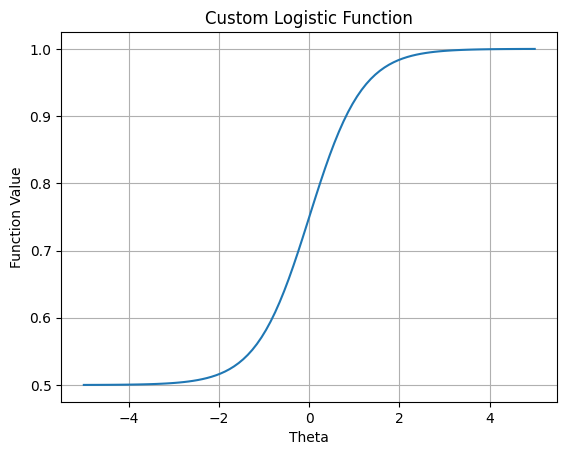

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# 定义函数
def custom_logistic(theta, c, D, a, b):
    return c + (1 - c) / (1 + torch.exp(-D * a * (theta - b)))

# 设置参数
c_value = 0.5
D_value = 1.7
a_value = 1.0
b_value = 0

# 生成一些 theta 的值
theta_values = torch.linspace(-5, 5, 100)

# 计算函数值
function_values = custom_logistic(theta_values, c_value, D_value, a_value, b_value)

# 绘制图像
plt.plot(theta_values.numpy(), function_values.numpy())
plt.title('Custom Logistic Function')
plt.xlabel('Theta')
plt.ylabel('Function Value')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 0
mode = 'ours'
sensitive_name = 'escs'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
    
model.load('/zjq/zhangdacao/pisa/save_new/A_ESCS_IRT_CDM_ours/model-epoch79-auc0.801-acc0.725')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Australia


NameError: name 'MyDataset' is not defined

In [2]:
model.eval(test_loader, device='cuda:0')

evaluating:   0%|                                                            | 0/99 [00:00<?, ?it/s]

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:06<00:00, 14.15it/s]


0.25879185596500087 0.26950925181013674 0.2586078771364875
0.3083560399636694 0.27737417943107223 0.28916201117318435


(0.005096146601828553,
 -0.01919402879048504,
 0.00018397882851339808,
 0.7339327880847416,
 0.802168277777505,
 0.7248585544664914,
 [0.3, 0.45, 1.0, 0.95, 0.7])

In [1]:
import os

def get_last_file_in_subfolders(parent_folder):
    path_list = []
    # 获取父文件夹中的所有子文件夹，并按名称排序
    subfolders = sorted(next(os.walk(parent_folder))[1])

    # 遍历排序后的子文件夹
    for subfolder in subfolders:
        subfolder_path = os.path.join(parent_folder, subfolder)
        # 获取当前子文件夹中的所有文件
        filenames = next(os.walk(subfolder_path))[2]
        # 如果子文件夹中有文件
        if filenames:
            # 打印当前子文件夹的路径
            #print("子文件夹:", subfolder_path)
            # 获取最后一个文件的路径
            last_file = os.path.join(subfolder_path, filenames[-1])
            #print("最后一个文件:", last_file)
            path_list.append(last_file)
    return path_list

# 调用函数，传入父文件夹的路径
parent_folder_path = "/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce"
paths = get_last_file_in_subfolders(parent_folder_path)
paths


['/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_1/model-epoch96-auc0.786-acc0.711',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_2/model-epoch79-auc0.789-acc0.713',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_3/model-epoch100-auc0.791-acc0.72',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_4/model-epoch68-auc0.802-acc0.728',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_5/model-epoch64-auc0.794-acc0.717',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_6/model-epoch59-auc0.8-acc0.726',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_7/model-epoch65-auc0.801-acc0.726',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_8/model-epoch49-auc0.801-acc0.726',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_ce/A_ESCS_IRT_CDM_9/model-epoch75-auc0.803-acc0.727']

In [2]:
import pandas as pd
import sys
sys.path.insert(0, '/zjq/zhangdacao/pisa/datasets')
# sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 0
mode = 'ours'
sensitive_name = 'escs'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
CE_EOS = []
CE_AUCS = []
for path in paths:
    model.load(path)
    EO, _, _, _, AUC, _, _  = model.eval(test_loader, device='cuda:0')
    print(EO, AUC)
    CE_EOS.append(EO)
    CE_AUCS.append(AUC)
    
#model.load('/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/A_ESCS_IRT_CDM_without_fair*/model-epoch81-auc0.799-acc0.723')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Australia
174808 24723 50196
{'user_id': tensor(7419), 'item_id': tensor(144), 'response': tensor(0.), 'FISCED': tensor(1), 'ESCS': tensor(-0.5399), 'knowledge_list': tensor([14, 26, 40, 33]), 'cls_labels': [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]}
8485 184


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:09<00:00, 10.08it/s]


0.27090694935217907 0.3068821765523294 0.30542482041119645
0.3103239479261278 0.25706783369803066 0.266145251396648
0.016626031401495014 0.7898385678268789


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.63it/s]


0.2764597004879691 0.3032984714400644 0.28090165964825364
0.2994247653648199 0.25925601750547045 0.2849162011173184
0.011745769005799793 0.7930433510335207


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.30it/s]


0.209658421672556 0.24127843194617127 0.22776814466187767
0.36239782016348776 0.31807439824945294 0.3206703910614525
0.01295425703928012 0.7956786299946433


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.02it/s]


0.2757866397442369 0.20982959116506983 0.2164973990587069
0.2859521646987587 0.3437199124726477 0.3307262569832402
0.029646071466268242 0.8053104477704867


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.53it/s]


0.25071512704021537 0.2790901777225189 0.28412187267773104
0.3135028761731759 0.2768490153172867 0.266145251396648
0.014706280251176412 0.7967622437636068


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.08it/s]


0.24852767962308597 0.2613179258392452 0.22591032945256373
0.3153194066000605 0.285164113785558 0.3211173184357542
0.01463949304255875 0.8030684085142802


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 16.74it/s]


0.24701329294968866 0.25649089446354134 0.23978201634877383
0.3188010899182561 0.28682713347921224 0.31262569832402237
0.0068418881376129375 0.803330580084948


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.19it/s]


0.2493690055527511 0.2600014627367805 0.23049294030220457
0.31683318195579774 0.2835010940919037 0.3240223463687151
0.012202494651072052 0.8043550322297586


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.60it/s]


0.2764597004879691 0.2216777590872523 0.24795640326975477
0.2873145625189222 0.32603938730853393 0.3007821229050279
0.02237078003907976 0.8054044686835566


In [3]:
import os

def get_last_file_in_subfolders(parent_folder):
    path_list = []
    # 获取父文件夹中的所有子文件夹，并按名称排序
    subfolders = sorted(next(os.walk(parent_folder))[1])

    # 遍历排序后的子文件夹
    for subfolder in subfolders:
        subfolder_path = os.path.join(parent_folder, subfolder)
        # 获取当前子文件夹中的所有文件
        filenames = next(os.walk(subfolder_path))[2]
        # 如果子文件夹中有文件
        if filenames:
            # 打印当前子文件夹的路径
            #print("子文件夹:", subfolder_path)
            # 获取最后一个文件的路径
            last_file = os.path.join(subfolder_path, filenames[-1])
            #print("最后一个文件:", last_file)
            path_list.append(last_file)
    return path_list

# 调用函数，传入父文件夹的路径
parent_folder_path = "/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls"
paths = get_last_file_in_subfolders(parent_folder_path)
paths


['/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_1/model-epoch79-auc0.801-acc0.724',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_2/model-epoch38-auc0.795-acc0.721',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_3/model-epoch100-auc0.802-acc0.728',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_4/model-epoch67-auc0.797-acc0.72',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_5/model-epoch80-auc0.803-acc0.727',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_6/model-epoch58-auc0.792-acc0.711',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_7/model-epoch81-auc0.8-acc0.725',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_8/model-epoch68-auc0.797-acc0.725',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_cls/A_ESCS_IRT_CDM_9/model-epoch97-auc0.795-acc0.719']

In [4]:
import pandas as pd
import sys
#sys.path.append('/zjq/zhangdacao/pisa/datasets')
sys.path.insert(0, '/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 0
mode = 'ours'
sensitive_name = 'escs'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
CLS_EOS = []
CLS_AUCS = []
for path in paths:
    model.load(path)
    EO, _, _, _, AUC, _, _  = model.eval(test_loader, device='cuda:0')
    print(EO, AUC)
    CLS_EOS.append(EO)
    CLS_AUCS.append(AUC)
    
#model.load('/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/A_ESCS_IRT_CDM_without_fair*/model-epoch81-auc0.799-acc0.723')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Australia


174808 24723 50196
{'user_id': tensor(7419), 'item_id': tensor(144), 'response': tensor(0.), 'FISCED': tensor(1), 'ESCS': tensor(-0.5399), 'knowledge_list': tensor([14, 26, 40, 33]), 'cls_labels': [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]}
8485 184


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.76it/s]


0.2577822648494027 0.2563446207854897 0.26579142927916766
0.2992733878292461 0.2874398249452954 0.2911731843575419
0.004156062854215949 0.804526729953189


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.24it/s]


0.2530708396432778 0.2691435676150077 0.28560812484518205
0.3119891008174387 0.28656455142231946 0.2659217877094972
0.013283612115639882 0.7969412971756947


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.15it/s]


0.25021033148241634 0.2286988956337307 0.2011394599950458
0.3169845594913715 0.3264770240700219 0.3546368715083799
0.020083754611141615 0.8042060305927969


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.15it/s]


0.26686858488978626 0.28903678783002995 0.27495665097844935
0.29336966394187103 0.267746170678337 0.2757541899441341
0.009159671806430432 0.7995934529813757


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 16.85it/s]


0.20292781423523476 0.21246251736999922 0.19507059697795393
0.3695125643354526 0.33549234135667394 0.36201117318435755
0.007111222131403291 0.8055319400080045


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.57it/s]


0.2963149924280666 0.30944196591823303 0.35286103542234337
0.270057523463518 0.2538293216630197 0.21251396648044693
0.024163765361302852 0.794582192712175


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 16.88it/s]


0.24230186774356388 0.25883127331236744 0.2415159772108001
0.325915834090221 0.2849890590809628 0.30502793296089387
0.007983721991043436 0.8031114506859003


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.36it/s]


0.24650849739188962 0.22277481167263946 0.23532325984642066
0.32531032394792614 0.33304157549234137 0.3153072625698324
0.009694562785045947 0.8002040810464668


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.03it/s]


0.24179707218576474 0.27440942002486657 0.28560812484518205
0.325915834090221 0.27282275711159737 0.26011173184357544
0.018584296107668024 0.7981961609723784


In [5]:
import os

def get_last_file_in_subfolders(parent_folder):
    path_list = []
    # 获取父文件夹中的所有子文件夹，并按名称排序
    subfolders = sorted(next(os.walk(parent_folder))[1])

    # 遍历排序后的子文件夹
    for subfolder in subfolders:
        subfolder_path = os.path.join(parent_folder, subfolder)
        # 获取当前子文件夹中的所有文件
        filenames = next(os.walk(subfolder_path))[2]
        # 如果子文件夹中有文件
        if filenames:
            # 打印当前子文件夹的路径
            #print("子文件夹:", subfolder_path)
            # 获取最后一个文件的路径
            last_file = os.path.join(subfolder_path, filenames[-1])
            #print("最后一个文件:", last_file)
            path_list.append(last_file)
    return path_list

# 调用函数，传入父文件夹的路径
parent_folder_path = "/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev"
paths = get_last_file_in_subfolders(parent_folder_path)
paths


['/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_1/model-epoch67-auc0.802-acc0.727',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_2/model-epoch79-auc0.802-acc0.727',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_3/model-epoch79-auc0.803-acc0.728',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_4/model-epoch100-auc0.802-acc0.726',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_5/model-epoch79-auc0.801-acc0.724',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_6/model-epoch52-auc0.801-acc0.726',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_7/model-epoch65-auc0.8-acc0.724',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_8/model-epoch66-auc0.801-acc0.727',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_rev/A_ESCS_IRT_CDM_9/model-epoch67-auc0.802-acc0.727']

In [6]:
import pandas as pd
import sys
#sys.path.append('/zjq/zhangdacao/pisa/datasets')
sys.path.insert(0, '/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 0
mode = 'ours'
sensitive_name = 'escs'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
REV_EOS = []
REV_AUCS = []
for path in paths:
    model.load(path)
    EO, _, _, _, AUC, _, _  = model.eval(test_loader, device='cuda:0')
    print(EO, AUC)
    REV_EOS.append(EO)
    REV_AUCS.append(AUC)
    
#model.load('/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/A_ESCS_IRT_CDM_without_fair*/model-epoch81-auc0.799-acc0.723')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Australia


174808 24723 50196
{'user_id': tensor(7419), 'item_id': tensor(144), 'response': tensor(0.), 'FISCED': tensor(1), 'ESCS': tensor(-0.5399), 'knowledge_list': tensor([14, 26, 40, 33]), 'cls_labels': [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]}
8485 184


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.88it/s]


0.23203769140164898 0.2591969575074965 0.23643794897200887
0.3301544050862852 0.28700218818380746 0.31597765363128494
0.011902196210093821 0.804349037279317


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.65it/s]


0.24331145885916206 0.2526146419951729 0.2513004706465197
0.32515894641235243 0.2929540481400438 0.3025698324022346
0.00411096869003885 0.8040909768068911


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:06<00:00, 15.93it/s]


0.25206124852767964 0.2518101367658889 0.23903889026504832
0.3104753254617015 0.2940043763676149 0.313072625698324
0.006080475210069844 0.8053626396228932


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.19it/s]


0.25021033148241634 0.25488188400497336 0.2577408967054744
0.3139570087798971 0.2890153172866521 0.2934078212290503
0.0031038823211399593 0.8040227633852433


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.93it/s]


0.2577822648494027 0.2563446207854897 0.26579142927916766
0.2992733878292461 0.2874398249452954 0.2911731843575419
0.004156062854215949 0.804526729953189


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.71it/s]


0.24869594480901902 0.25905068382944485 0.25204359673024523
0.3148652739933394 0.28700218818380746 0.3012290502793296
0.004314403051055184 0.8034278816929264


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.13it/s]


0.25256604408547867 0.26797337819059464 0.23804805548674757
0.31274598849530727 0.28420131291028444 0.31374301675977656
0.012218760057609687 0.8023638838960387


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.25it/s]


0.2518929833417466 0.2549550208439991 0.2498142184790686
0.31229185588858616 0.2888402625820569 0.304804469273743
0.002111481469773742 0.803988782638983


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.11it/s]


0.2566044085478715 0.2531997367073795 0.25154817934109486
0.3042688465031789 0.2936542669584245 0.2976536312849162
0.0021051493973648157 0.8042333592868474


In [7]:
import os

def get_last_file_in_subfolders(parent_folder):
    path_list = []
    # 获取父文件夹中的所有子文件夹，并按名称排序
    subfolders = sorted(next(os.walk(parent_folder))[1])

    # 遍历排序后的子文件夹
    for subfolder in subfolders:
        subfolder_path = os.path.join(parent_folder, subfolder)
        # 获取当前子文件夹中的所有文件
        filenames = next(os.walk(subfolder_path))[2]
        # 如果子文件夹中有文件
        if filenames:
            # 打印当前子文件夹的路径
            #print("子文件夹:", subfolder_path)
            # 获取最后一个文件的路径
            last_file = os.path.join(subfolder_path, filenames[-1])
            #print("最后一个文件:", last_file)
            path_list.append(last_file)
    return path_list

# 调用函数，传入父文件夹的路径
parent_folder_path = "/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair"
paths = get_last_file_in_subfolders(parent_folder_path)
paths


['/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_1/model-epoch99-auc0.805-acc0.729',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_2/model-epoch75-auc0.802-acc0.725',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_3/model-epoch78-auc0.803-acc0.729',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_4/model-epoch74-auc0.802-acc0.727',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_5/model-epoch93-auc0.802-acc0.728',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_6/model-epoch79-auc0.803-acc0.729',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_7/model-epoch67-auc0.803-acc0.728',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_8/model-epoch93-auc0.803-acc0.727',
 '/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/w_fair/A_ESCS_IRT_CDM_9/model-epoch93-auc0.803-acc0.728']

In [8]:
import pandas as pd
import sys
#sys.path.append('/zjq/zhangdacao/pisa/datasets')
sys.path.insert(0, '/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 0
mode = 'ours'
sensitive_name = 'escs'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
FAIR_EOS = []
FAIR_AUCS = []
for path in paths:
    model.load(path)
    EO, _, _, _, AUC, _, _  = model.eval(test_loader, device='cuda:0')
    print(EO, AUC)
    FAIR_EOS.append(EO)
    FAIR_AUCS.append(AUC)
    
#model.load('/zjq/zhangdacao/pisa/save_new/Ablation_study/IRT/A_ESCS_IRT_CDM_without_fair*/model-epoch81-auc0.799-acc0.723')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Australia


174808 24723 50196
{'user_id': tensor(7419), 'item_id': tensor(144), 'response': tensor(0.), 'FISCED': tensor(1), 'ESCS': tensor(-0.5399), 'knowledge_list': tensor([14, 26, 40, 33]), 'cls_labels': [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]}
8485 184


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.48it/s]


0.24549890627629145 0.21312074892123167 0.14936834282883327
0.3157735392067817 0.33916849015317285 0.43262569832402237
0.03993578120628288 0.8077920908824217


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 16.83it/s]


0.26787817600538444 0.2513713157317341 0.22479564032697552
0.29352104147744473 0.295054704595186 0.32625698324022345
0.017747763050888297 0.8047284682192369


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.21it/s]


0.24448931516069328 0.2373290426387772 0.2197176120881843
0.3206176203451408 0.3034573304157549 0.3307262569832402
0.010408699682578638 0.8059404759830187


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.31it/s]


0.24230186774356388 0.24471586338038465 0.23978201634877383
0.31683318195579774 0.29908096280087526 0.30972067039106144
0.0020143891414231077 0.8045012233325397


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.28it/s]


0.2475180885074878 0.24786074745849485 0.23730492940302206
0.3068422646079322 0.29417943107221006 0.31486033519553075
0.004897293230506488 0.804967513658811


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.15it/s]


0.24179707218576474 0.24478900021941052 0.23507555115184542
0.3192552225249773 0.2998687089715536 0.31798882681564244
0.004061767146289856 0.8047249845368469


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.36it/s]


0.24583543664815755 0.2477144737804432 0.23841961852861038
0.31819557977596125 0.2966301969365427 0.3101675977653631
0.0040127501386793 0.804567609064532


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.39it/s]


0.2606427730102642 0.25334601038543114 0.2434976467674015
0.30351195882531035 0.29059080962800876 0.30905027932960893
0.007025258908948078 0.8054814851828607


evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.30it/s]


0.27006562342251383 0.2524683683171214 0.2506811989100818
0.29125037844383894 0.29277899343544855 0.3023463687150838
0.008747147315375297 0.8057696094652438


In [19]:
print(EOS, AUCS)
EO = [round(eo, 3) for eo in EOS]
AUC = [round(auc, 3) for auc in AUCS]
EO, AUC

[0.03993578120628288, 0.017689229576407447, 0.010473013766552576, 0.0019338569710981384, 0.004897293230506488, 0.004061767146289856, 0.0040127501386793, 0.006969681204778384, 0.008747147315375297] [0.8077920908824217, 0.8047284682192369, 0.8059404759830187, 0.8045012233325397, 0.804967513658811, 0.8047249845368469, 0.804567609064532, 0.8054814851828607, 0.8057696094652438]


([0.04, 0.018, 0.01, 0.002, 0.005, 0.004, 0.004, 0.007, 0.009],
 [0.808, 0.805, 0.806, 0.805, 0.805, 0.805, 0.805, 0.805, 0.806])

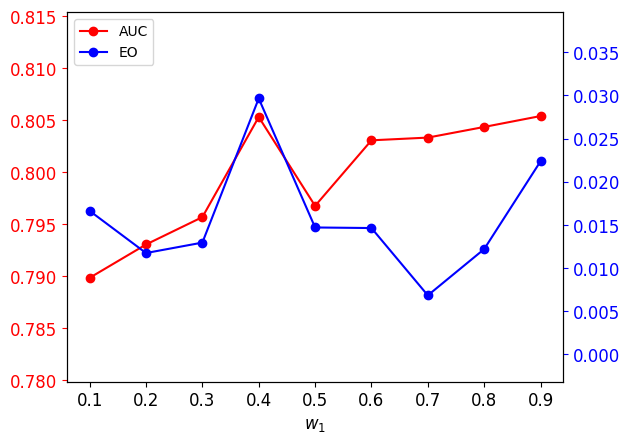

In [13]:
import matplotlib.pyplot as plt

# 数据
x = [i/10 for i in range(1, 10)]  # 横轴数据
aucs = [0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93]  # AUCS 数据
eos = [0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86]  # EOS 数据

# 创建画布和子图
fig, ax1 = plt.subplots()
ax1.tick_params(axis='x', labelsize=12)
# 绘制左边纵轴的数据（AUCS）
ax1.plot(x, CE_AUCS, 'r-', label='AUC', marker='o')
ax1.tick_params('y', colors='r', labelsize=12)
ax1.set_ylim(min(CE_AUCS) - 0.01, max(CE_AUCS) + 0.01)

# 创建右边纵轴
ax2 = ax1.twinx()
# 绘制右边纵轴的数据（EOS）
ax2.plot(x, CE_EOS, 'b-', label='EO', marker='o')
ax2.tick_params('y', colors='b', labelsize=12)
ax2.set_ylim(min(CE_EOS) - 0.01, max(CE_EOS) + 0.01)

ax1.set_xlabel(r'$w_1$', fontsize=12)
# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.savefig('w1.pdf', bbox_inches='tight', dpi=1000)
# 显示图形
plt.show()


In [9]:
AUC_list = [CE_AUCS, CLS_AUCS, REV_AUCS, FAIR_AUCS]
EO_list = [CE_EOS, CLS_EOS, REV_EOS, FAIR_EOS]

In [11]:
import pickle
with open('AUC_list.pkl', 'wb') as f:
    pickle.dump(AUC_list, f)

with open('EO_list.pkl', 'wb') as f:
    pickle.dump(EO_list, f)


In [69]:
FAIR_EOS

[0.03993578120628288,
 0.017689229576407447,
 0.010408699682578638,
 0.0020143891414231077,
 0.004820926683132898,
 0.004061767146289856,
 0.0040127501386793,
 0.007025258908948078,
 0.008747147315375297]

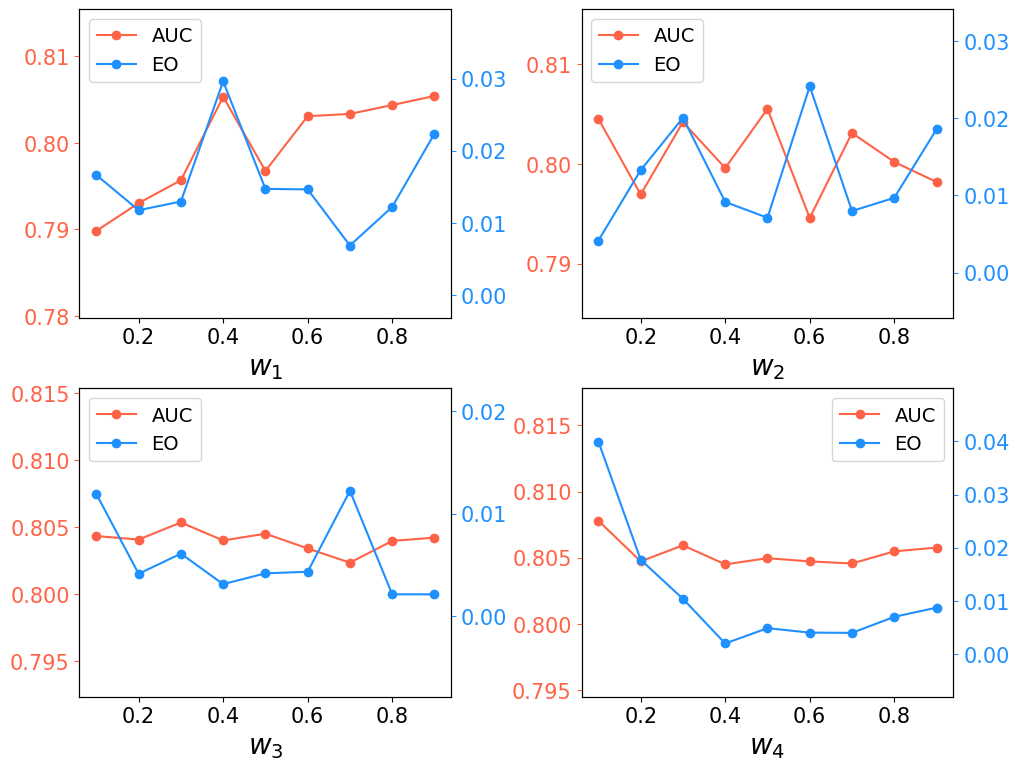

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, MultipleLocator

# 创建画布和子图，2行2列
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
plt.tight_layout(pad=3.0)
x = [i/10 for i in range(1, 10)]
# 循环遍历每行
for i in range(2):
    # 循环遍历每列
    for j in range(2):
        ax = axs[i, j]  # 获取当前子图对象
        ax.tick_params(axis='x', labelsize=15)
        
        # 获取当前子图对应的 AUC 和 EO 数据
        AUC_data = AUC_list[i * 2 + j]  # 根据行列索引计算出对应的数据索引
        EO_data = EO_list[i * 2 + j]

        # 绘制左边纵轴的数据（AUCS）
        ax.plot(x, AUC_data, 'tomato', label='AUC', marker='o')
        ax.tick_params(axis='y', colors='tomato', labelsize=15)  # 设置左边纵轴标签大小
        ax.set_ylim(min(AUC_data) - 0.01, max(AUC_data) + 0.01)

        # 创建右边纵轴
        ax2 = ax.twinx()
        # 绘制右边纵轴的数据（EOS）
        ax2.plot(x, EO_data, 'dodgerblue', label='EO', marker='o')
        ax2.tick_params(axis='y', colors='dodgerblue', labelsize=15)  # 设置右边纵轴标签大小
        ax2.set_ylim(min(EO_data) - 0.01, max(EO_data) + 0.01)
        
        # ax.yaxis.set_major_locator(AutoLocator())
        # ax2.yaxis.set_major_locator(AutoLocator())
        if i == 0:
            ax.yaxis.set_major_locator(MultipleLocator(0.01))
        else:
            ax.yaxis.set_major_locator(MultipleLocator(0.005))
        ax2.yaxis.set_major_locator(MultipleLocator(0.01))

        # 添加图例
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        lines = lines1 + lines2
        labels = labels1 + labels2
        if i == 1 and j == 1:
            ax.legend(lines, labels, loc='upper right', prop={'size': 14})
        else:
            ax.legend(lines, labels, loc='upper left', prop={'size': 14})

        # 添加横坐标标签
        index =  i * 2 + j + 1
        ax.set_xlabel(f'$w_{index}$', fontsize=20)  # 使用 LaTeX 表达式设置标签
        



plt.subplots_adjust(wspace=0.35)
plt.savefig('w.pdf', bbox_inches='tight', dpi=1000)  # 保存图片
# 显示图形
plt.show()


In [ ]:
Base = [0.2569, 0.2194, 0.1743]
Base_1 = [0.3047, 0.2436, 0.1574]
Base1_1 = [0.2531, 0.3054, 0.4170]
Reg = [0.2290, 0.2170, 0.2021]
Adv = [0.2436, 0.2136, 0.1738]
PSCRF = [0.2588, 0.2700, 0.2586]
0.3047282517247182 0.24361881079499748 0.15741887540252664 #fnr
0.2531032394792613 0.30538293216630197 0.41698324022346367


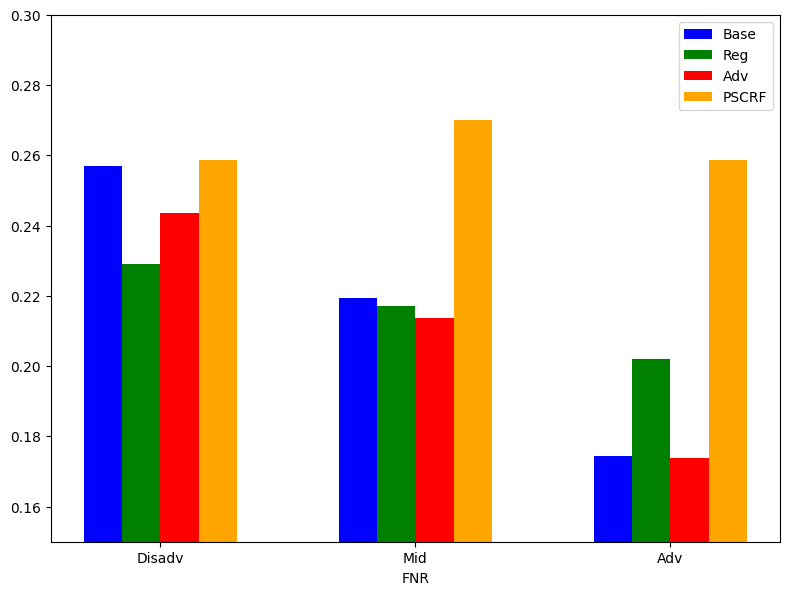

In [14]:
import matplotlib.pyplot as plt

# 数据
categories = ['Disadv', 'Mid', 'Adv']
Base = [0.2569, 0.2194, 0.1743]
Reg = [0.2290, 0.2170, 0.2021]
Adv = [0.2436, 0.2136, 0.1738]
PSCRF = [0.2588, 0.2700, 0.2586]

x = range(len(categories))

# 绘图
plt.figure(figsize=(8, 6))
bar_width = 0.15

plt.bar(x, Base, width=bar_width, label='Base', color='b', align='center')
plt.bar([i + bar_width for i in x], Reg, width=bar_width, label='Reg', color='g', align='center')
plt.bar([i + 2 * bar_width for i in x], Adv, width=bar_width, label='Adv', color='r', align='center')
plt.bar([i + 3 * bar_width for i in x], PSCRF, width=bar_width, label='PSCRF', color='orange', align='center')

plt.xlabel('FNR')
plt.xticks([i + 1.5 * bar_width for i in x], categories)

plt.legend()
plt.tight_layout()

plt.ylim(0.15, 0.3)

plt.show()


In [ ]:
Base = [0.3104, 0.3422, 0.4036]
Reg = [0.3392, 0.3450, 0.3692]
Adv = [0.3208, 0.3519, 0.4013]
PSCRF = [0.3084, 0.2774, 0.2892]

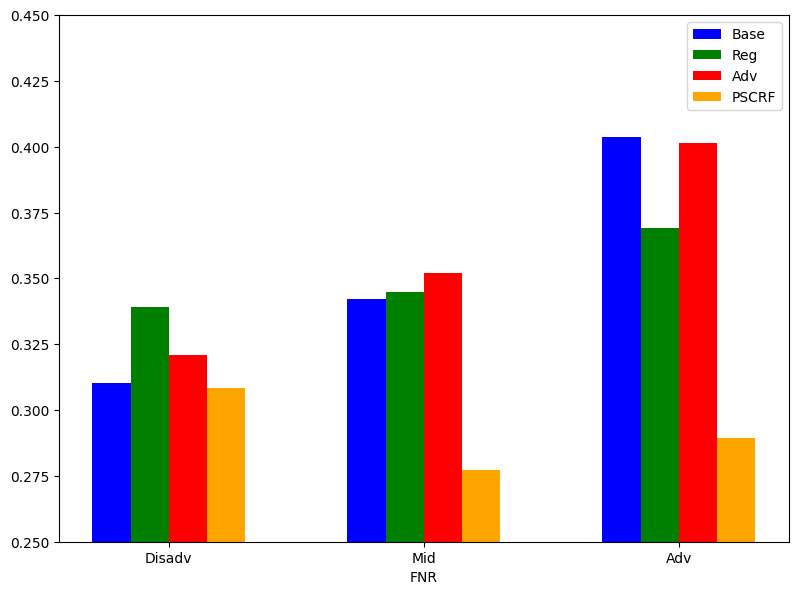

In [12]:
import matplotlib.pyplot as plt

# 数据
categories = ['Disadv', 'Mid', 'Adv']
Base = [0.3104, 0.3422, 0.4036]
Reg = [0.3392, 0.3450, 0.3692]
Adv = [0.3208, 0.3519, 0.4013]
PSCRF = [0.3084, 0.2774, 0.2892]

x = range(len(categories))

# 绘图
plt.figure(figsize=(8, 6))
bar_width = 0.15

plt.bar(x, Base, width=bar_width, label='Base', color='b', align='center')
plt.bar([i + bar_width for i in x], Reg, width=bar_width, label='Reg', color='g', align='center')
plt.bar([i + 2 * bar_width for i in x], Adv, width=bar_width, label='Adv', color='r', align='center')
plt.bar([i + 3 * bar_width for i in x], PSCRF, width=bar_width, label='PSCRF', color='orange', align='center')

plt.xlabel('FNR')
plt.xticks([i + 1.5 * bar_width for i in x], categories)

plt.legend()
plt.tight_layout()
plt.ylim(0.25, 0.45)

plt.show()


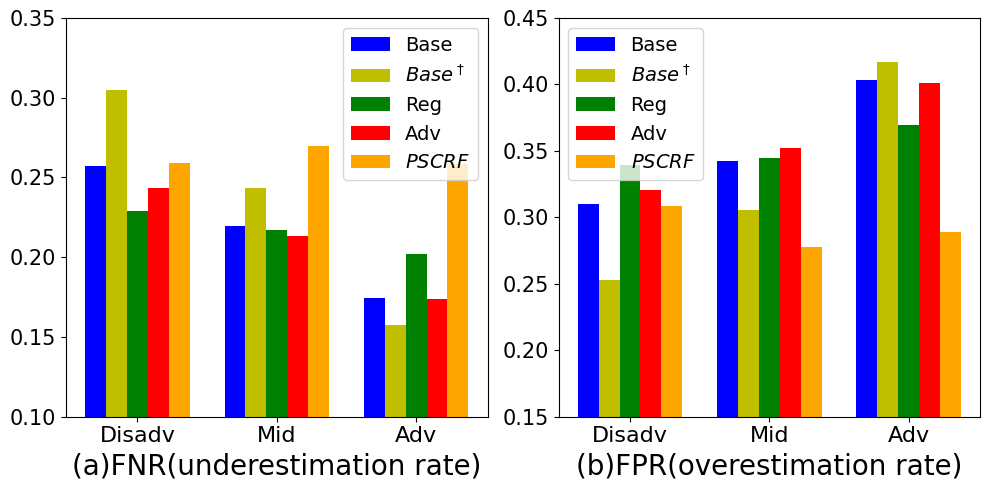

In [1]:
import matplotlib.pyplot as plt

# 数据
categories = ['Disadv', 'Mid', 'Adv']
Base = [0.3104, 0.3422, 0.4036]
Base_1 = [0.2531, 0.3054, 0.4170]
Reg = [0.3392, 0.3450, 0.3692]
Adv = [0.3208, 0.3519, 0.4013]
PSCRF = [0.3084, 0.2774, 0.2892]

Base1 = [0.2569, 0.2194, 0.1743]
Base1_1 = [0.3047, 0.2436, 0.1574]
Reg1 = [0.2290, 0.2170, 0.2021]
Adv1 = [0.2436, 0.2136, 0.1738]
PSCRF1 = [0.2588, 0.2700, 0.2586]

x = range(len(categories))

# 创建两个子图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 绘制第一个子图
axs[0].bar(x, Base1, label='Base', color='b', width=0.15, align='center')
axs[0].bar([i + 0.15 for i in x], Base1_1, label=r'$\mathit{Base^\dagger}$', color='y', width=0.15, align='center')
axs[0].bar([i + 0.30 for i in x], Reg1, label='Reg', color='g', width=0.15, align='center')
axs[0].bar([i + 0.45 for i in x], Adv1, label='Adv', color='r', width=0.15, align='center')
axs[0].bar([i + 0.60 for i in x], PSCRF1, label=r'$\mathit{PSCRF}$', color='orange', width=0.15, align='center')

axs[0].set_xlabel('(a)FNR(underestimation rate)', fontsize=20)
axs[0].set_xticks([i + 0.3 for i in x])
axs[0].set_xticklabels(categories, fontsize=16)

axs[0].legend(fontsize=14)

# 绘制第二个子图
axs[1].bar(x, Base, label='Base', color='b', width=0.15, align='center')
axs[1].bar([i + 0.15 for i in x], Base_1, label=r'$\mathit{Base^\dagger}$', color='y', width=0.15, align='center')
axs[1].bar([i + 0.30 for i in x], Reg, label='Reg', color='g', width=0.15, align='center')
axs[1].bar([i + 0.45 for i in x], Adv, label='Adv', color='r', width=0.15, align='center')
axs[1].bar([i + 0.60 for i in x], PSCRF, label=r'$\mathit{PSCRF}$', color='orange', width=0.15, align='center')

axs[1].set_xlabel('(b)FPR(overestimation rate)', fontsize=20)
axs[1].set_xticks([i + 0.3 for i in x])
axs[1].set_xticklabels(categories, fontsize=16)

axs[1].legend(fontsize=14)

# 设置纵坐标轴范围
axs[0].set_ylim(0.1, 0.35)
axs[1].set_ylim(0.15, 0.45)

axs[0].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.savefig('case_study.pdf', bbox_inches='tight', dpi=1000)
# 显示图形
plt.show()
